In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold 
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout,Activation,AveragePooling2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
import sklearn.metrics
import plotly.express as px
from conf_matrix_vis import make_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import pyplot

import os

In [2]:
dataset = np.load("../converted_dataset2.npy",allow_pickle=True)
np.random.shuffle(dataset)


test_dataset = np.load("../converted_test_dataset2.npy",allow_pickle=True)
np.random.shuffle(test_dataset)



img_row=28
img_col=28


N = np.shape(dataset)[0]
N2 = np.shape(test_dataset)[0]

x_train = dataset[:N, 0]
x_train = np.array([x.reshape(img_row, img_col, 1) for x in x_train])
y_train = dataset[:N, 1]
y_train = np.array([[x] for x in y_train])

x_test = test_dataset[:N2, 0]
x_test = np.array([x.reshape(img_row, img_col, 1) for x in x_test])
y_test = test_dataset[:N2, 1]
y_test = np.array([[x] for x in y_test])

x_train=x_train/255.0
x_test=x_test/255.0


print(len(x_train))
print(len(x_test))


95000
20000


In [28]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])
    return model
    

In [29]:
dataX=x_train
dataY=y_train
n_folds=5
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(dataX):

    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    model = baseline_model()
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)




# history = model.fit(x_train,y_train,
#               batch_size=32,
#               epochs=5,
#               validation_split=0.2,
#               shuffle=True,
#               verbose=2)

> 98.989
> 99.163
> 98.337
> 99.253
> 99.126


<ipython-input-30-dc5adfd1e780>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 1)
<ipython-input-30-dc5adfd1e780>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 2)


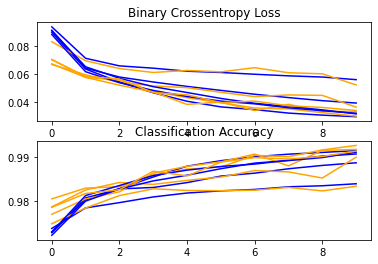

In [30]:
for i in range(len(histories)):
    # plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Binary Crossentropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
pyplot.show()

In [31]:
model = baseline_model()


history = model.fit(x_train,y_train,
              batch_size=32,
              epochs=10,
              validation_split=0.2,
              shuffle=True,
              verbose=2)

Epoch 1/10
2375/2375 - 11s - loss: 0.0912 - accuracy: 0.9728 - val_loss: 0.0650 - val_accuracy: 0.9805
Epoch 2/10
2375/2375 - 10s - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.0558 - val_accuracy: 0.9838
Epoch 3/10
2375/2375 - 11s - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0489 - val_accuracy: 0.9844
Epoch 4/10
2375/2375 - 10s - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.0435 - val_accuracy: 0.9859
Epoch 5/10
2375/2375 - 10s - loss: 0.0431 - accuracy: 0.9868 - val_loss: 0.0458 - val_accuracy: 0.9875
Epoch 6/10
2375/2375 - 11s - loss: 0.0399 - accuracy: 0.9884 - val_loss: 0.0415 - val_accuracy: 0.9868
Epoch 7/10
2375/2375 - 10s - loss: 0.0376 - accuracy: 0.9893 - val_loss: 0.0353 - val_accuracy: 0.9901
Epoch 8/10
2375/2375 - 11s - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 9/10
2375/2375 - 11s - loss: 0.0337 - accuracy: 0.9903 - val_loss: 0.0341 - val_accuracy: 0.9899
Epoch 10/10
2375/2375 - 11s - loss: 0.0321 - accuracy: 0.9908 - val_loss:

In [32]:
predictions = model.predict(x_test)

In [34]:
rounded = [[round(x[0])] for x in predictions]

target_names = ["malicious","benign"]
print(sklearn.metrics.classification_report(y_test,rounded,labels = [1,0], target_names=target_names))

              precision    recall  f1-score   support

   malicious       0.98      0.97      0.98     10000
      benign       0.97      0.98      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



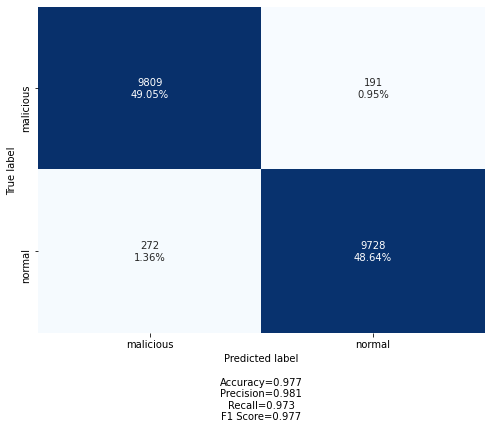

In [36]:
cf_matrix = confusion_matrix(y_test,rounded)
make_confusion_matrix(cf_matrix, figsize=(8,6),categories=["malicious","normal"], cbar=False)

In [ ]:
#Precision=TP/(TP+FP) ratio of correctly predicted as attacks to all samples predicted as attacks
#Recall=DetectionRate=TP/(TP+FN) ratio of correctly predicted as attacks to all samples that are actually attacks
#FalseAlarmRate=FP/(FP+TN) ratio of incorrectly predicted samples as attacks to all samples that are actually bening
#TrueNegativeRate=TN/(TN+FP) ratio of correctly predicted as benign to all samples predicted as benign

In [37]:
#How many convolutional layers/pooling pairs

nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(8,(3, 3),padding='same',activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    if j>0:
        model[j].add(Conv2D(16,(3, 3),padding='same',activation='relu'))
        model[j].add(MaxPooling2D((2, 2)))
    if j>1:
        model[j].add(Conv2D(32,(3, 3),padding='same',activation='relu'))
        model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    model[j].add(Dense(16, activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [40]:
history = [0] * nets
names = ["Conv/Pool-1pairs","Conv/Pool-2pairs","Conv/Pool-3pairs"]
ep=10
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.2,
              shuffle=True,
              verbose=0)

    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))


CNN Conv/Pool-1pairs: Epochs=10, Train accuracy=0.99247, Validation accuracy=0.99221
CNN Conv/Pool-2pairs: Epochs=10, Train accuracy=0.99542, Validation accuracy=0.99516
CNN Conv/Pool-3pairs: Epochs=10, Train accuracy=0.99670, Validation accuracy=0.99589


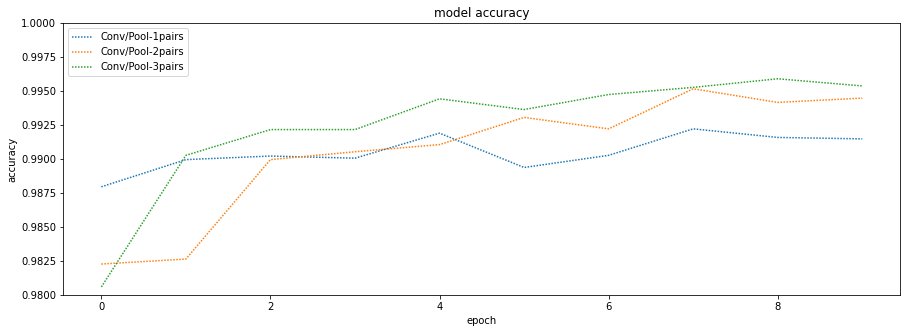

In [41]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [43]:
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,(3, 3),activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Conv2D(j*16+16,(3, 3),activation='relu'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    model[j].add(Dense(16, activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [44]:
#How many maps
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
ep=10
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.2,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 8 maps: Epochs=10, Train accuracy=0.99243, Validation accuracy=0.99189
CNN 16 maps: Epochs=10, Train accuracy=0.99421, Validation accuracy=0.99437
CNN 24 maps: Epochs=10, Train accuracy=0.99509, Validation accuracy=0.99437
CNN 32 maps: Epochs=10, Train accuracy=0.99522, Validation accuracy=0.99542
CNN 48 maps: Epochs=10, Train accuracy=0.99563, Validation accuracy=0.99505
CNN 64 maps: Epochs=10, Train accuracy=0.99633, Validation accuracy=0.99626


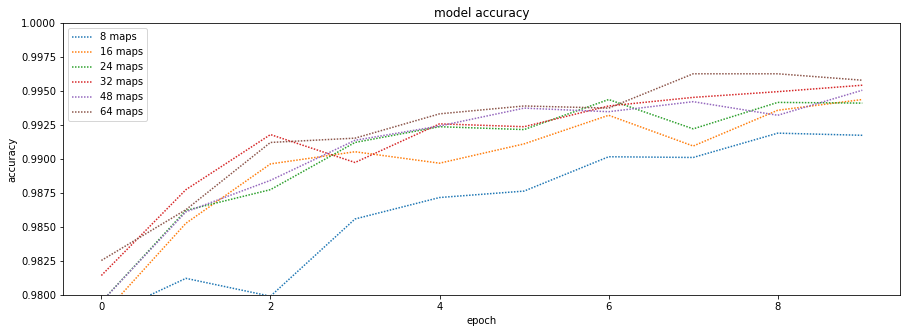

In [45]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [40]:
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(24,(3, 3),activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Conv2D(48,(3, 3),activation='relu'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [48]:
history = [0] * nets
names = ["16Neurons","32Neurons","64Neurons","128Neurons","256Neurons","512Neurons"]
ep = 10
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.2,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 16Neurons: Epochs=10, Train accuracy=0.99613, Validation accuracy=0.99584
CNN 32Neurons: Epochs=10, Train accuracy=0.99791, Validation accuracy=0.99626
CNN 64Neurons: Epochs=10, Train accuracy=0.99837, Validation accuracy=0.99679
CNN 128Neurons: Epochs=10, Train accuracy=0.99896, Validation accuracy=0.99721
CNN 256Neurons: Epochs=10, Train accuracy=0.99846, Validation accuracy=0.99689
CNN 512Neurons: Epochs=10, Train accuracy=0.99900, Validation accuracy=0.99737


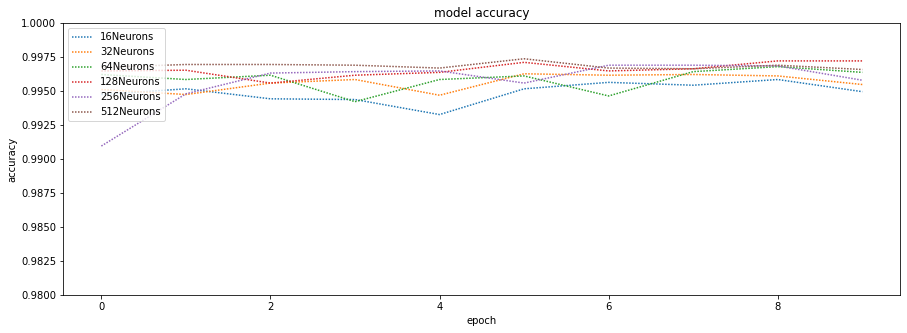

In [49]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [50]:
#Dropout
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(24,(3, 3),activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(48,(3, 3),activation='relu'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [51]:
history = [0] * nets
names = ["Dropout0%","Dropout10%","Dropout20%","Dropout30%","Dropout40%","Dropout50%","Dropout60%","Dropout70%"]
ep = 10
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.3,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN Dropout0%: Epochs=10, Train accuracy=0.99690, Validation accuracy=0.99604
CNN Dropout10%: Epochs=10, Train accuracy=0.99457, Validation accuracy=0.99453
CNN Dropout20%: Epochs=10, Train accuracy=0.99241, Validation accuracy=0.99361
CNN Dropout30%: Epochs=10, Train accuracy=0.98869, Validation accuracy=0.99175
CNN Dropout40%: Epochs=10, Train accuracy=0.98611, Validation accuracy=0.98898
CNN Dropout50%: Epochs=10, Train accuracy=0.98194, Validation accuracy=0.98439
CNN Dropout60%: Epochs=10, Train accuracy=0.97859, Validation accuracy=0.98060
CNN Dropout70%: Epochs=10, Train accuracy=0.97534, Validation accuracy=0.97832


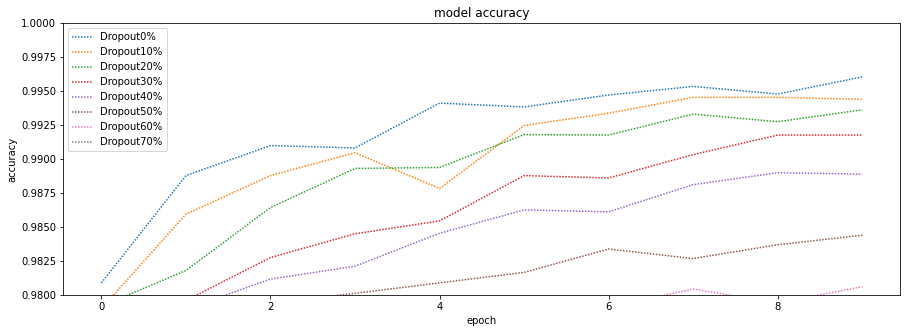

In [52]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [71]:
model= Sequential()
model.add(Conv2D(32,(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [73]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])


In [74]:
history = model.fit(x_train,y_train,
              batch_size=32,
              epochs=10,
              validation_split=0.2,
              shuffle=True,
              verbose=2)

Epoch 1/10
2375/2375 - 19s - loss: 0.0761 - accuracy: 0.9760 - val_loss: 0.0575 - val_accuracy: 0.9815
Epoch 2/10
2375/2375 - 18s - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.0378 - val_accuracy: 0.9890
Epoch 3/10
2375/2375 - 18s - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0248 - val_accuracy: 0.9922
Epoch 4/10
2375/2375 - 18s - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.0210 - val_accuracy: 0.9933
Epoch 5/10
2375/2375 - 18s - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0184 - val_accuracy: 0.9949
Epoch 6/10
2375/2375 - 18s - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0189 - val_accuracy: 0.9948
Epoch 7/10
2375/2375 - 18s - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0193 - val_accuracy: 0.9939
Epoch 8/10
2375/2375 - 18s - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0145 - val_accuracy: 0.9954
Epoch 9/10
2375/2375 - 18s - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0150 - val_accuracy: 0.9961
Epoch 10/10
2375/2375 - 18s - loss: 0.0077 - accuracy: 0.9975 - val_loss:

In [75]:
predictions = model.predict(x_test)

In [76]:
rounded = [[round(x[0])] for x in predictions]

target_names = ["malicious","benign"]
print(sklearn.metrics.classification_report(y_test,rounded,labels = [1,0], target_names=target_names))

              precision    recall  f1-score   support

   malicious       0.99      0.97      0.98     10000
      benign       0.97      0.99      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



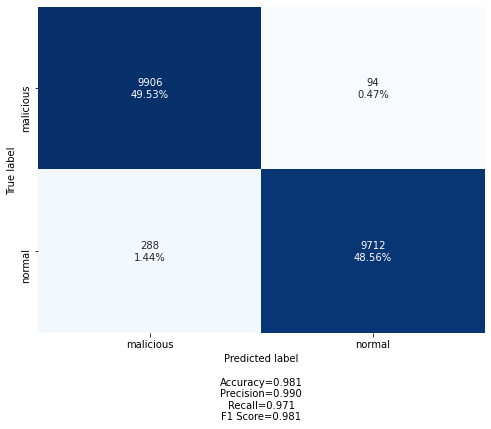

In [77]:
cf_matrix = confusion_matrix(y_test,rounded)
make_confusion_matrix(cf_matrix, figsize=(8,6),categories=["malicious","normal"], cbar=False)